# 이산형 확률분포


## 1차원 이산형 확률분포


In [1]:
import numpy as np
import matplotlib.pyplot as plt

%precision 3
%matplotlib inline


### 1차원 이산확률분포의 정의


In [2]:
x_set = np.array([1, 2, 3, 4, 5, 6])


In [3]:
def f(x):
    if x in x_set:
        return x / 21
    else:
        return 0


In [4]:
X = [x_set, f]


In [5]:
# 확률 p_k를 구한다
prob = np.array([f(x_k) for x_k in x_set])
# x_k와 p_k의 대응을 사전식으로 표시
dict(zip(x_set, prob))


{1: 0.048, 2: 0.095, 3: 0.143, 4: 0.190, 5: 0.238, 6: 0.286}

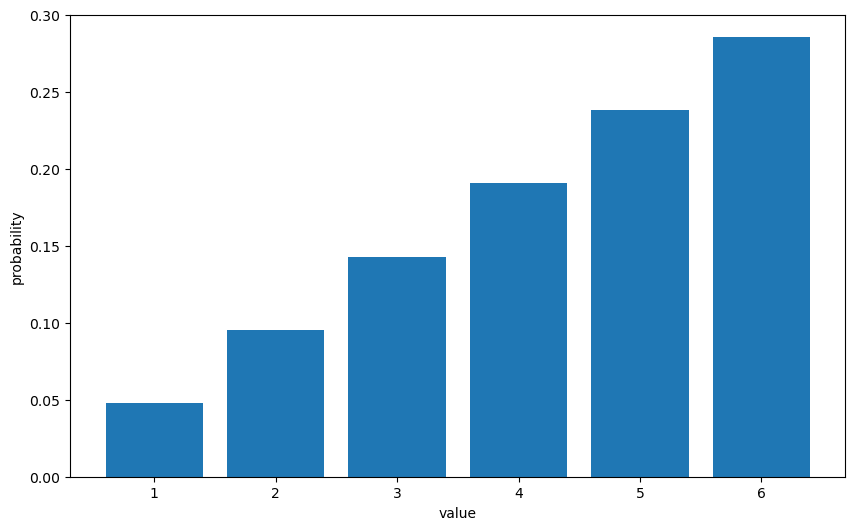

In [6]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.bar(x_set, prob)
ax.set_xlabel("value")
ax.set_ylabel("probability")

plt.show()


In [7]:
np.all(prob >= 0)


True

In [8]:
np.sum(prob)


1.000

In [9]:
def F(x):
    return np.sum([f(x_k) for x_k in x_set if x_k <= x])


In [10]:
F(3)


0.286

In [11]:
y_set = np.array([2 * x_k + 3 for x_k in x_set])
prob = np.array([f(x_k) for x_k in x_set])
dict(zip(y_set, prob))


{5: 0.048, 7: 0.095, 9: 0.143, 11: 0.190, 13: 0.238, 15: 0.286}

### 1차원 이산형 확률변수의 지표


#### 평균


In [12]:
np.sum([x_k * f(x_k) for x_k in x_set])


4.333

In [13]:
sample = np.random.choice(x_set, int(1e6), p=prob)
np.mean(sample)


4.334

In [14]:
def E(X, g=lambda x: x):
    x_set, f = X
    return np.sum([g(x_k) * f(x_k) for x_k in x_set])


In [15]:
E(X)


4.333

In [16]:
E(X, g=lambda x: 2 * x + 3)


11.667

In [17]:
2 * E(X) + 3


11.667

#### 분산


In [18]:
mean = E(X)
np.sum([(x_k - mean) ** 2 * f(x_k) for x_k in x_set])


2.222

In [19]:
def V(X, g=lambda x: x):
    x_set, f = X
    mean = E(X, g)
    return np.sum([(g(x_k) - mean) ** 2 * f(x_k) for x_k in x_set])


In [20]:
V(X)


2.222

In [21]:
V(X, lambda x: 2 * x + 3)


8.889

In [22]:
2**2 * V(X)


8.889

## 2차원 이산형 확률분포


### 2차원 이산형 확률분포의 정의


In [23]:
x_set = np.arange(2, 13)
y_set = np.arange(1, 7)


In [24]:
def f_XY(x, y):
    if 1 <= y <= 6 and 1 <= x - y <= 6:
        return y * (x - y) / 441
    else:
        return 0


In [25]:
XY = [x_set, y_set, f_XY]


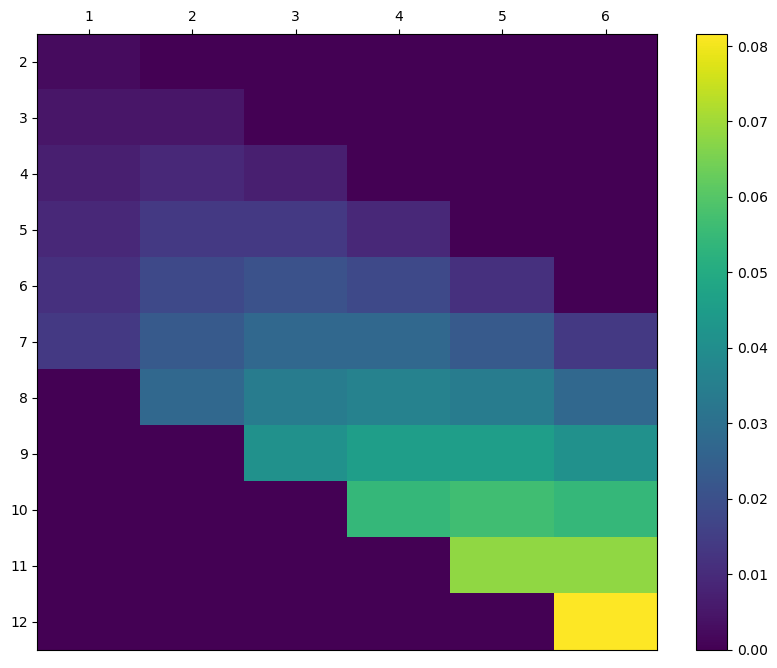

In [26]:
prob = np.array([[f_XY(x_i, y_j) for y_j in y_set] for x_i in x_set])

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)

c = ax.pcolor(prob)
ax.set_xticks(np.arange(prob.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(prob.shape[0]) + 0.5, minor=False)
ax.set_xticklabels(np.arange(1, 7), minor=False)
ax.set_yticklabels(np.arange(2, 13), minor=False)
# y축을 내림차순의 숫자가 되게 하여, 위 아래를 역전시킨다
ax.invert_yaxis()
# x축의 눈금을 그래프 위쪽에 표시
ax.xaxis.tick_top()
fig.colorbar(c, ax=ax)
plt.show()


In [27]:
np.all(prob >= 0)


True

In [28]:
np.sum(prob)


1.000

In [29]:
def f_X(x):
    return np.sum([f_XY(x, y_k) for y_k in y_set])


In [30]:
def f_Y(y):
    return np.sum([f_XY(x_k, y) for x_k in x_set])


In [31]:
X = [x_set, f_X]
Y = [y_set, f_Y]


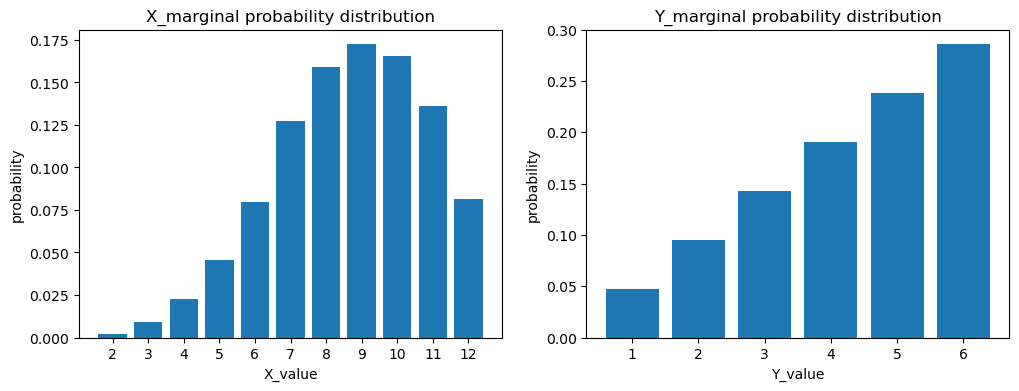

In [32]:
prob_x = np.array([f_X(x_k) for x_k in x_set])
prob_y = np.array([f_Y(y_k) for y_k in y_set])

fig = plt.figure(figsize=(12, 4))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.bar(x_set, prob_x)
ax1.set_title("X_marginal probability distribution")
ax1.set_xlabel("X_value")
ax1.set_ylabel("probability")
ax1.set_xticks(x_set)

ax2.bar(y_set, prob_y)
ax2.set_title("Y_marginal probability distribution")
ax2.set_xlabel("Y_value")
ax2.set_ylabel("probability")

plt.show()


### 2차원 이산형 확률분포의 지표


In [33]:
np.sum([x_i * f_XY(x_i, y_j) for x_i in x_set for y_j in y_set])


8.667

In [34]:
def E(XY, g):
    x_set, y_set, f_XY = XY
    return np.sum([g(x_i, y_j) * f_XY(x_i, y_j) for x_i in x_set for y_j in y_set])


In [35]:
mean_X = E(XY, lambda x, y: x)
mean_X


8.667

In [36]:
mean_Y = E(XY, lambda x, y: y)
mean_Y


4.333

In [37]:
a, b = 2, 3


In [38]:
E(XY, lambda x, y: a * x + b * y)


30.333

In [39]:
a * mean_X + b * mean_Y


30.333

In [40]:
np.sum([(x_i - mean_X) ** 2 * f_XY(x_i, y_j) for x_i in x_set for y_j in y_set])


4.444

In [41]:
def V(XY, g):
    x_set, y_set, f_XY = XY
    mean = E(XY, g)
    return np.sum(
        [(g(x_i, y_j) - mean) ** 2 * f_XY(x_i, y_j) for x_i in x_set for y_j in y_set]
    )


In [42]:
var_X = V(XY, g=lambda x, y: x)
var_X


4.444

In [43]:
var_Y = V(XY, g=lambda x, y: y)
var_Y


2.222

In [44]:
def Cov(XY):
    x_set, y_set, f_XY = XY
    mean_X = E(XY, lambda x, y: x)
    mean_Y = E(XY, lambda x, y: y)
    return np.sum(
        [
            (x_i - mean_X) * (y_j - mean_Y) * f_XY(x_i, y_j)
            for x_i in x_set
            for y_j in y_set
        ]
    )


In [45]:
cov_xy = Cov(XY)
cov_xy


2.222

In [46]:
V(XY, lambda x, y: a * x + b * y)


64.444

In [47]:
a**2 * var_X + b**2 * var_Y + 2 * a * b * cov_xy


64.444

In [48]:
cov_xy / np.sqrt(var_X * var_Y)


0.707